The rewards assigned as -1 for reachable state and -100 for obstacle state

[-100   -1 -100   -1  100]
[-1 -1 -1 -1 -1]
[  -1 -100   -1   -1 -100]
[  -1   -1 -100   -1   -1]
[  -1   -1   -1   -1 -100]




Intermediate learned q values for every 100 time intervals episode 0:

[[[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [-50.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]]


Intermediate learned q values for every 100 time intervals episode 100:

[[[  0.           0.           0.      

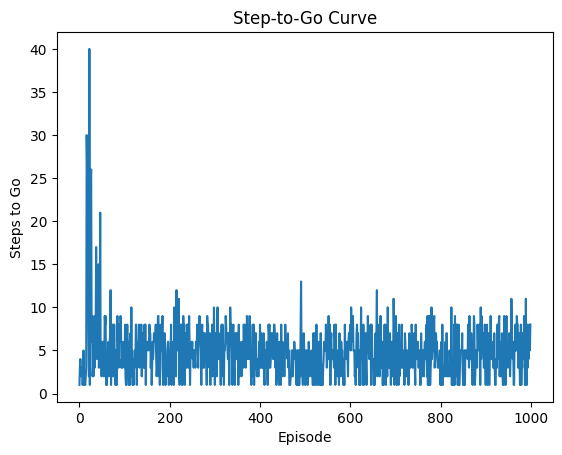

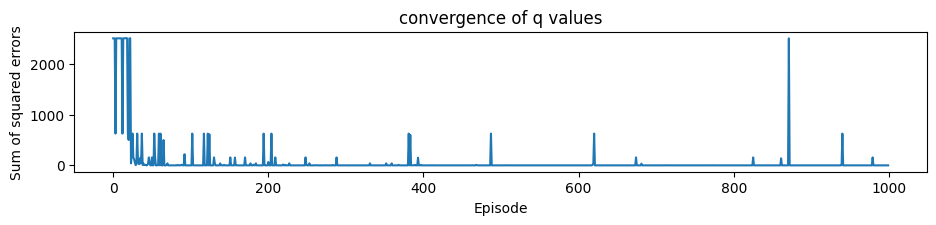

In [1]:
#importing needed libraries

import numpy as np
import random
import matplotlib.pyplot as plt

#giving size of the gridworld as 5*5

gridrows=5
gridcolumns=5
epsilon=0.5


#In This array we define 5 rows and 5 columns given as based on size of gridworld
#The third dimension given as 4 is action where it is used to store the state,action pair values while finding shortest path towards maximum reward
#All state and action pair values are initially assigned 0.
qvalues=np.zeros((gridrows,gridcolumns,4))
#creating list of action directions to go
# 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']
#an array to store the rewards for all states
rewards = np.full((gridrows,gridcolumns),-100)

#assigning the value 100 for the cell for making it as a destination to find shortest path for maximizing the reward
rewards[0,4] = 100
#giving the possible reachable routes for going towards the destination
reachable_gridcells = {}
reachable_gridcells[0]= [1,3]
reachable_gridcells[1]= [i for i in range(0,5)]
reachable_gridcells[2]= [0,2,3]
reachable_gridcells[3]=[0,1,3,4]
reachable_gridcells[4] = [i for i in range(0,4)]

#assigning all the rewards as -1 to minimze penalty for visting reachable cell as it encourages the current action to go to next state instead of going to obstacles with reward of -100

for row in range(0,5):
  for column in reachable_gridcells[row]:
    rewards[row,column] =-1
#print rewards matrix
print("The rewards assigned as -1 for reachable state and -100 for obstacle state\n")
for i in rewards:
 print(i)
print("\n")

#creating function to find if the reward is -100 as if it is cell with obstacle
def obstacle_state(currentrowindex, currentcolumnindex):
  #returning false if reward is -1 as it is reachable cell with no obstacles
  if rewards[currentrowindex,currentcolumnindex] == -1:
    return False
  else:
    return True
#creating function to start from the random location of grid cell
def randomstartlocation():
  # assigning random row and column number to start towards the destination
  currentrowindex= np.random.randint(gridrows)
  currentcolumnindex = np.random.randint(gridcolumns)
  #moving towards the next grid cell until it reaches the obstacles
  while obstacle_state(currentrowindex, currentcolumnindex):
    currentrowindex = np.random.randint(gridrows)
    currentcolumnindex = np.random.randint(gridcolumns)
  return currentrowindex,currentcolumnindex
#creating epsilon greedy algorithm to find the next action
def getnextaction(currentrowindex, currentcolumnindex,epsilon):
  #if the random value is in range (0,1) is lower than epsilon then we choose optimal value from the q table finded by iterating episodes
  if np.random.random()<epsilon:
    return np.argmax(qvalues[currentrowindex,currentcolumnindex])
  else: #choosing a random action
    return np.random.randint(4)
#creating a function to find optimal move for current selected action
def getnextlocation(currentrowindex, currentcolumnindex, actionindex):
  newrowindex = currentrowindex
  newcolumnindex = currentcolumnindex
  if actions[actionindex] == 'up' and currentrowindex > 0:
    newrowindex -= 1
  elif actions[actionindex] == 'right' and currentcolumnindex < gridcolumns-1:
    newcolumnindex += 1
  elif actions[actionindex] == 'down' and currentrowindex < gridrows-1:
    newrowindex += 1
  elif actions[actionindex] == 'left' and currentcolumnindex > 0:
    newcolumnindex -= 1
  return newrowindex, newcolumnindex

#creating a function to find shortest path for the chosen grid cell

def getshortestpath(startrowindex, startcolumnindex):
  #if the initial state of grid cell has obstacle return to function
  if obstacle_state(startrowindex, startcolumnindex):
    return []
  else:
    currentrowindex, currentcolumnindex = startrowindex, startcolumnindex
    shortestpath =[]
    shortestpath.append([currentrowindex, currentcolumnindex])
    #moving towards the destination cell for maximum reward
    while not obstacle_state(currentrowindex, currentcolumnindex):
      #choose optimal action
      actionindex = getnextaction(currentrowindex, currentcolumnindex,1)
      #storing the current visited grid location and moving towards next reachable gridcell
      currentrowindex,currentcolumnindex = getnextlocation(currentrowindex, currentcolumnindex, actionindex)
      shortestpath.append([currentrowindex, currentcolumnindex])
    return shortestpath

#creating key constraints
epsilon = 0.9 #here 0.9 means we gave high probability to choose optiomal action rather than choosing action randomly
discountfactor = 0.5 #discount factor for moving to next state
learningrate = 0.5 #the learning rate for moving to next state
printinterval=100 #for printing intermediate q tables for every 100 iterations

#creating list for appending steps and squared errors for episodes
stepsperepisode = []
squarederrorvalues=[]

# considering for 1000 episodes
for episode in range(1000):
  squarederror=0
  totalsteps=0
  oldqvalues=qvalues.copy()
  #assigning random starting grid cell location
  rowindex,columnindex = randomstartlocation()
  #continue to next grid cells unless reaching obstacles
  while not obstacle_state(rowindex, columnindex):
    #choose the particular action to take
     actionindex = getnextaction(rowindex, columnindex, epsilon)
     #storing the old row,column index
     oldrowindex, oldcolumnindex = rowindex, columnindex
     rowindex, columnindex = getnextlocation(rowindex, columnindex, actionindex)
    #assigning reward for moving to next state of gridcell
     reward = rewards[rowindex, columnindex]
     oldqvalue = qvalues[oldrowindex, oldcolumnindex, actionindex]
     difference = reward + (discountfactor * np.max(qvalues[rowindex, columnindex]))-oldqvalue
    #from above calculations we update q value
     newqvalue = oldqvalue + (learningrate * difference)
     qvalues[oldrowindex, oldcolumnindex, actionindex] = newqvalue
     newlearnedqtable=qvalues
     totalsteps += 1
     squarederror+=(newqvalue - oldqvalue) ** 2

  squarederrorvalues.append(squarederror)
  stepsperepisode.append(totalsteps)
  if episode%printinterval == 0:
        print("\n")
        print(f"Intermediate learned q values for every 100 time intervals episode {episode}:\n")
        print(qvalues)
print("\n")
print("Total steps involved for every single episode out of 1000 episodes is\n")
print(stepsperepisode)
print("\n")
print("Total squared errors for every episode out of 1000 episodes is\n")
print(squarederrorvalues)
print("\n")
print("The final learned q table is\n")
print(newlearnedqtable)
print("\n")

#Using plt function we display visual graph of total steps taken to reach the destination of max reward for each episode of the 1000 episodes where we give each episode on x axis and steps taken for each episode on y axis.

plt.plot(range(1000), stepsperepisode)
plt.title('Step-to-Go Curve')
plt.xlabel('Episode')
plt.ylabel('Steps to Go')
print('\n')

#we display the graph for viewing the sum of squared errors for each episode where the errors are calculated with the help of after updating new q value and subtracting it from the old q values so sum of squared errors means for every grid cell transition of the algorithm to reach destination its old transition value need to be updated with current calculated q value that makes difference where the difference is used for calculating squared error

plt.figure(figsize=(11,4))
plt.subplot(2,1,1)
plt.plot(range(1000), squarederrorvalues)
plt.title('convergence of q values')
plt.xlabel('Episode')
plt.ylabel('Sum of squared errors')



#finding some of the shortest paths by giving (row,column) of the gridworld
print("the shortest paths for given row,column grid cell to reach the destination are\n")
print(getshortestpath(3,1))
print(getshortestpath(0,1))
print(getshortestpath(3,4))
print("\n")